# **Asignment 1**

**1. Import packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from google.colab import drive

**2. Connect notebook to Google Drive**

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


**3. Import data**

In [3]:
df = pd.read_excel('/content/gdrive/MyDrive/ColabTrial/data.xlsx')
df = df[df['year'] > 1958] # Selecting relevant years
df.head()

,year,quarter,gdp_deflator,m2_velocity,m2_stock,real_gdp
48,1959,Q1,16.336,1.773,287.8,3123.978
49,1959,Q2,16.361,1.789,292.1,3194.429
50,1959,Q3,16.424,1.773,296.1,3196.683
51,1959,Q4,16.489,1.779,297.1,3205.790
52,1960,Q1,16.555,1.817,298.6,3277.847


**4. Calculating inflation**

In [4]:
df['gdp_def_pct_change'] = df.gdp_deflator.pct_change(4) # Yoy Inflation
df

,year,quarter,gdp_deflator,m2_velocity,m2_stock,real_gdp,gdp_def_pct_change
48,1959,Q1,16.336,1.773,287.8,3123.978,NaN
49,1959,Q2,16.361,1.789,292.1,3194.429,NaN
50,1959,Q3,16.424,1.773,296.1,3196.683,NaN
51,1959,Q4,16.489,1.779,297.1,3205.790,NaN
52,1960,Q1,16.555,1.817,298.6,3277.847,0.013406
...,...,...,...,...,...,...,...
297,2021,Q2,117.922,1.134,20329.8,19544.248,0.043622
298,2021,Q3,119.712,1.131,20822.2,19672.594,0.050372
299,2021,Q4,121.708,1.142,21327.8,20006.181,0.061173
300,2022,Q1,124.174,1.140,21699.4,19924.088,0.069359


In [5]:
# For graphing purposes, let's add a column merging year and quarter:
df['year_quarter'] = df['year'].astype(str) + ' ' + df['quarter']

**5. Graph**

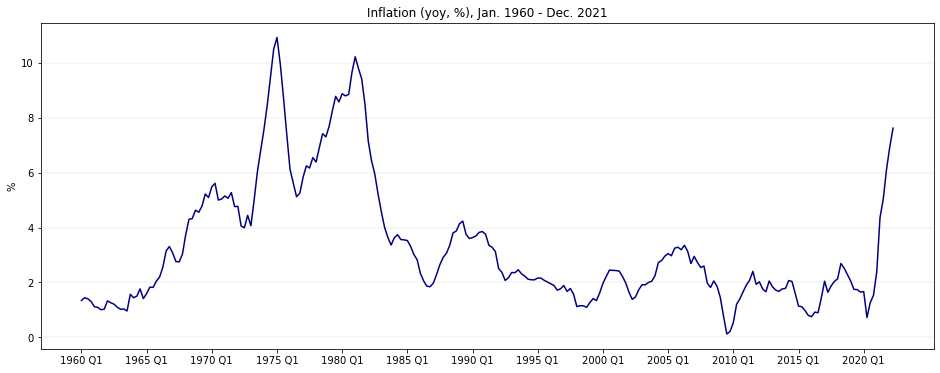

In [6]:
# We already have all the data. Let's plot:

fig = plt.figure(figsize=(16, 6))
ax = plt.subplot()

# Creating our x axes
x = []
for i in range(4, len(df.year_quarter), 20):
    x.append(df.year_quarter.iloc[i])


ax.plot(df.year_quarter, df.gdp_def_pct_change*100, color = 'navy')

ax.set_xticks(ax.get_xticks()[4::20]) # Selecting x-ticks
plt.title('Inflation (yoy, %), Jan. 1960 - Dec. 2021')
plt.grid(axis = 'y', linewidth = 0.2)
ax.set_ylabel('%')

plt.show()